# TRAIN #1

## Data Exploration

โดยชุดข้อมูลนี้ต้องการให้เราทำนายว่าผู้ใช้งาน credit_card จะมีแนวโน้มว่าจะยกเลิก หรือ จะใช้งาน credit_card ต่อไปโดยวิเคราะห์จาก feature ที่มี
จากข้อมูลที่ได้มามี feature ทั้งหมด 23 feature และมี sample ทั้งหมด 10127 คน จากคำแนะนำของชุดข้อมูลได้ทำการลบ 2 feature สุดท้ายออก<br>
แยก feature Attrition_Flag ออกมาเก็บในตัวแปล df_y เหลือชุดข้อมูลในการวิเคราะห์ทั้งหมด 20 feature

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

df = pd.read_csv('credit_card_churn.csv',sep=',')
df.columns = ["CLIENTNUM","Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
df_y = df["Attrition_Flag"]
df = df.drop(["Attrition_Flag","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis = 1)
print(df.shape)
df.head()

(10127, 20)


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


โดยชุดข้อมูลของคนที่ใช้ Credit card อยู่ในปัจจุบันมีจำนวน 8500 คน และ ยกเลิก Credit card มีจำนวน 1627 คน<br>
จากการ check ข้อมูลไม่มี missing value ในชุดข้อมูล

In [83]:
print(df_y.value_counts())
print("")
# ดู missing valus
print(df.isnull().sum())
print(df.shape)
# code handmake
# for i in range(0,len(df.columns)):
#     print(df.columns[i] +"\t\t"+ str(df[str(df.columns[i])].isnull().sum()))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
(10127, 20)


## Model Building & Model Training

In [84]:
df_onehot = pd.get_dummies(df)

แยกชุดข้อมูลประเภท numeric and Categorical และเพื่ม y ที่เปลี่ยนข้อมูลจาก["Existing Customer","Attrited Customer"] เป็น [1,0] เข้าไปในข้อมูลทั้ง 2 ประเภท<br> 

In [85]:
df_class = df.select_dtypes(object)
df_numer = df.drop(df_class.columns,axis= 1)

อยากรู้ว่าในกรณที่ attributes หลายตัวจะคำนวนและเปลียบเทียบอย่างไร

In [86]:
#import machine learning library
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1,)
model = kmeans.fit(df_numer)

ผลลัพธ์การทำงานจาก การแบ่ง cluter ของแต่ละคน

In [87]:
from sklearn import metrics
labels = model.labels_
# print(df_y)
print(labels.shape)
labels

(10127,)


array([0, 0, 1, ..., 1, 1, 1])

ดู silhouette coefficient แล้วให้สังสัยว่าเท่าเทียบกันยังไง

In [88]:
metrics.silhouette_score(df_numer, labels, metric='euclidean')

0.8578395951888667

In [89]:
#Calcutate distance
def get_distance(X,Y,x_point,y_point):
  return np.sort(np.sqrt((X-x_point)**2 + (Y-y_point)**2))
df_numer.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

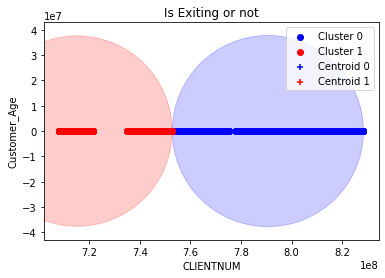

In [90]:
#Plot results
Cluster0 = df_numer[model.labels_ == 0]
Cluster1 = df_numer[model.labels_ == 1]
cx1 = model.cluster_centers_[0] # เรียกตัว centers
cx2 = model.cluster_centers_[1]

for i in range(1):
    distance1 = get_distance(Cluster0[str(Cluster0.columns[i])],Cluster0[str(Cluster0.columns[i+1])],cx1[i],cx1[i+1])
    distance2 = get_distance(Cluster1[str(Cluster1.columns[i])],Cluster1[str(Cluster1.columns[i+1])],cx2[i],cx2[i+1])

    radious1 = max(distance1)
    radious2 = max(distance2)

    plt.title("Is Exiting or not")
    plt.xlabel(str(Cluster0.columns[i]))
    plt.ylabel(str(Cluster0.columns[i+1]))
    plt.axis('equal')

    circle1 = plt.Circle((cx1[i],cx1[i+1]),radious1,alpha=0.2,color='b')
    plt.gcf().gca().add_artist(circle1)
    circle2 = plt.Circle((cx2[i],cx2[i+1]),radious2,alpha=0.2,color='r')
    plt.gcf().gca().add_artist(circle2)

    plt.scatter(Cluster0[str(Cluster0.columns[i])],Cluster0[str(Cluster0.columns[i+1])],c='b',label = 'Cluster 0')
    plt.scatter(Cluster1[str(Cluster1.columns[i])],Cluster1[str(Cluster1.columns[i+1])],c='r',label = 'Cluster 1')
    plt.scatter(cx1[i],cx1[i+1],c='b',marker='+',label='Centroid 0')
    plt.scatter(cx2[i],cx2[i+1],c='r',marker='+',label='Centroid 1')
    plt.legend()

In [91]:
Num_K = [i+2 for i in range(9)]
silhouette_coef = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model = kmeans.fit(df_numer)
  labels = model.labels_
  silhouette_coef.append(metrics.silhouette_score(df_numer, labels, metric='euclidean'))
silhouette_coef

[0.8578395951888667,
 0.8289639541889676,
 0.8095072856269644,
 0.6049381264233372,
 0.6206610369047502,
 0.6179823913932474,
 0.6331321817916888,
 0.6140149848884776,
 0.6136169298253856]

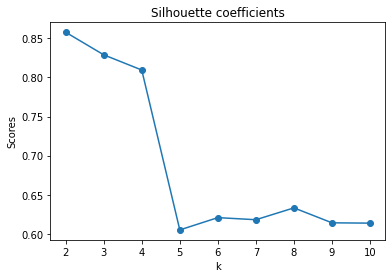

In [92]:
plt.scatter(Num_K,silhouette_coef)
plt.plot(Num_K,silhouette_coef)
plt.title('Silhouette coefficients')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

In [93]:
Num_K = [i+1 for i in range(10)]
WCSS = []

for k in Num_K:
  kmeans = KMeans(n_clusters=k, random_state=1,)
  model = kmeans.fit(df_numer)
  WCSS.append(model.inertia_)
# WCSS


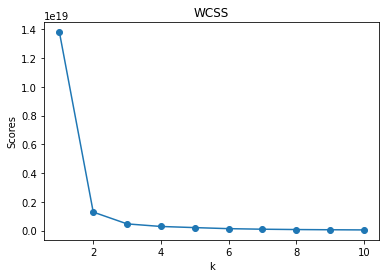

In [94]:
plt.scatter(Num_K,WCSS )
plt.plot(Num_K,WCSS )
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k')
plt.show()

จำนวน cluter อาจบอกกลุ่มของพวก outliner หรือ อะไรบ้างอย่างที่ ทำให้มันจับกลุ่มแบบนั้น